In [ ]:
%pip install ultralytics
import ultralytics
ultralytics.checks()
# Load YOLO11n-seg, train it on COCO128-seg for 3 epochs and predict an image with it
from ultralytics import YOLO

import cv2 as cv
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
# import matplotlib.image as mpimg
from IPython.display import display, Image

Ultralytics 8.3.75 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.1/107.7 GB disk)


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
!unzip -q /content/gdrive/MyDrive/Study/ITMO/ML/coursework/MH_01_easy.zip -d datasets

In [ ]:
path_to_data = "/content/datasets/mav0/cam0/data/"
images = []
images_paths = []



# prints mode of image
print(img.mode)

for image_filename in sorted(os.listdir(path_to_data)):
    path = f'{path_to_data}{image_filename}'
    img = Image(path)
    images.append(img)
    images_paths.append(path)

(752, 480)


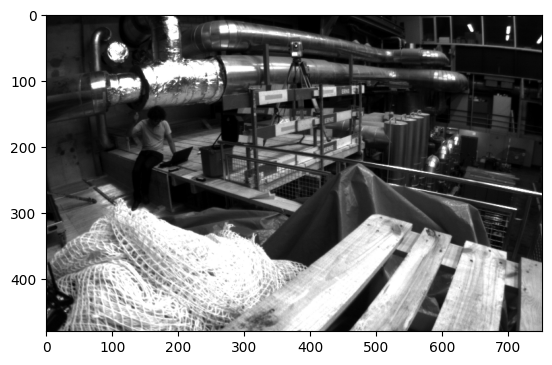

In [ ]:
from PIL import Image
img = Image.open(f'{images_paths[0]}')
img_shape = (img.width, img.height)
print(img_shape)
plt.imshow(img, cmap='gray')

In [ ]:
model = YOLO('yolo11n-seg.pt')  # load a pretrained YOLO segmentation model
model.train(data='coco8-seg.yaml', epochs=10)  # train the model

100%|██████████| 5.90M/5.90M [00:00<00:00, 72.8MB/s]


Ultralytics 8.3.75 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=segment, mode=train, model=yolo11n-seg.pt, data=coco8-seg.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, lin

100%|██████████| 439k/439k [00:00<00:00, 10.2MB/s]
Unzipping /content/datasets/coco8-seg.zip to /content/datasets/coco8-seg...: 100%|██████████| 25/25 [00:00<00:00, 2816.94file/s]

Dataset download success ✅ (0.5s), saved to /content/datasets



100%|██████████| 755k/755k [00:00<00:00, 14.5MB/s]



                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

train: Scanning /content/datasets/coco8-seg/labels/train... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<00:00, 75.24it/s]

train: New cache created: /content/datasets/coco8-seg/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.4' (you have '2.0.3'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/datasets/coco8-seg/labels/val... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<00:00, 21345.06it/s]

val: New cache created: /content/datasets/coco8-seg/labels/val.cache


Plotting labels to runs/segment/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 90 weight(decay=0.0), 101 weight(decay=0.0005), 100 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/segment/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G     0.8096      2.511      1.658      1.234         13        640: 100%|██████████| 1/1 [00:05<00:00,  5.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.10s/it]

                   all          4         17      0.792      0.911      0.944      0.681      0.731       0.85      0.853      0.569



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G     0.8672      2.435      2.035      1.273         13        640: 100%|██████████| 1/1 [00:05<00:00,  5.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.05s/it]

                   all          4         17      0.779       0.91      0.942      0.684      0.719       0.85      0.851      0.569



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G     0.7977      2.787      1.554      1.017         13        640: 100%|██████████| 1/1 [00:04<00:00,  4.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.75s/it]

                   all          4         17      0.777       0.91      0.943      0.685      0.717       0.85      0.851      0.572



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G     0.7789      2.473      2.097      1.309         13        640: 100%|██████████| 1/1 [00:04<00:00,  4.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.90s/it]

                   all          4         17      0.776      0.912      0.939      0.679      0.714       0.85      0.849      0.571



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G     0.8768      2.312      1.879       1.37         13        640: 100%|██████████| 1/1 [00:05<00:00,  5.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.49s/it]

                   all          4         17      0.776      0.914      0.939      0.687      0.712       0.85       0.85      0.571



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G      1.005       2.34      2.243      1.401         13        640: 100%|██████████| 1/1 [00:04<00:00,  4.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.90s/it]

                   all          4         17      0.767       0.92      0.941       0.69      0.697       0.85       0.85      0.573



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G      1.014       2.71      2.026      1.264         13        640: 100%|██████████| 1/1 [00:05<00:00,  5.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.94s/it]

                   all          4         17      0.767      0.923      0.941      0.688      0.694       0.85       0.85      0.573



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G     0.9799      2.227      1.988      1.289         13        640: 100%|██████████| 1/1 [00:04<00:00,  4.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.06s/it]

                   all          4         17      0.767      0.926      0.942      0.689      0.691       0.85      0.852      0.573



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G     0.7361      2.338      1.979      1.084         13        640: 100%|██████████| 1/1 [00:05<00:00,  5.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.23s/it]

                   all          4         17      0.762       0.93      0.942      0.681      0.682       0.85      0.852      0.573



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G     0.9942      2.448      1.389      1.162         13        640: 100%|██████████| 1/1 [00:05<00:00,  5.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.28s/it]

                   all          4         17      0.679       0.85      0.879      0.674      0.679       0.85      0.849      0.573



10 epochs completed in 0.027 hours.
Optimizer stripped from runs/segment/train/weights/last.pt, 6.1MB
Optimizer stripped from runs/segment/train/weights/best.pt, 6.1MB

Validating runs/segment/train/weights/best.pt...
Ultralytics 8.3.75 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
YOLO11n-seg summary (fused): 265 layers, 2,868,664 parameters, 0 gradients, 10.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.28s/it]


                   all          4         17      0.769      0.919      0.941       0.69      0.699       0.85       0.85      0.573
                person          3         10      0.729        0.6      0.671       0.33      0.729        0.6      0.619      0.273
                   dog          1          1      0.708          1      0.995      0.895      0.708          1      0.995      0.895
                 horse          1          2      0.603          1      0.995      0.673      0.603          1      0.995      0.224
              elephant          1          2          1      0.917      0.995       0.35      0.583        0.5        0.5      0.252
              umbrella          1          1      0.652          1      0.995      0.995      0.652          1      0.995      0.895
          potted plant          1          1      0.921          1      0.995      0.895      0.921          1      0.995      0.895
Speed: 3.2ms preprocess, 475.0ms inference, 0.0ms loss, 3.1ms postpro

ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([ 0, 16, 17, 20, 25, 58])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f02ec0a4650>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0

In [ ]:
# Run batched inference on a list of images
model_trained = YOLO('/content/runs/segment/train/weights/best.pt')
results = model(path_to_data, stream=True)  # return a list of Results objects


In [ ]:
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    obb = result.obb  # Oriented boxes object for OBB outputs
    result.show()  # display to screen
    # result.save(filename="result.jpg")  # save to disk